# 로지스틱회귀
    - 병아리 날개 길이(wing_length), 꽁지깃 길이(tail_length), 성별(gender)

In [1]:
import pandas as pd

data = pd.read_csv('./dataset/ch6-1.csv')

display(data.head())
print(data.info())

,wing_length,tail_length,gender
0,44,9,m
1,42,9,m
2,43,8,m
3,40,10,m
4,44,8,m


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   gender       60 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.5+ KB
None


In [2]:
## 카테고리 변수 1,0으로 변환

data.gender = data.gender.map({'m' : 1, 'f':0})
data.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


## 로지스틱회귀 모델 훈련

In [3]:
import statsmodels.api as sm

model_glm = sm.Logit.from_formula('gender ~ wing_length + tail_length', data=data)
result_glm = model_glm.fit()

result_glm.summary()

Optimization terminated successfully.
         Current function value: 0.137215
         Iterations 9


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gender   No. Observations:                   60
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            2
Date:                Mon, 18 Jul 2022   Pseudo R-squ.:                  0.8020
Time:                        11:07:41   Log-Likelihood:                -8.2329
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                 3.264e-15
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.1955     23.410      2.999      0.003      24.313     116.078
wing_length    -1.0531      0.505     -2.087      0.037      -2.042      -0.064
tail_length    -2.3859      0.969     -2.462      0.014      -4.285      -0.486
===============================================================================
"""

## 성능평가

    - Confusion Matrix 
        - 민감도(=재현율) = 예측 실제 양성 일치 수 / 실제 양성 수
        - 특이도 = 예측 실제 음성 일치 수 / 실제 음성 수
        - 정밀도 = 예측 실제 양성 일치 수 / 예측 양성 수
        
    - ROC 커브
        - AUC = Area Under Curve ( ROC 커브 면적)
        - x축 : 1-특이도 y축 : 민감도

In [4]:
data.head()

,wing_length,tail_length,gender
0,44,9,1
1,42,9,1
2,43,8,1
3,40,10,1
4,44,8,1


In [5]:
y_prob = result_glm.predict(data.iloc[:, 0:2])
print(y_prob.head())
print()
print(list(map(round, y_prob)))

0    0.915579
1    0.988904
2    0.997049
3    0.985377
4    0.991588
dtype: float64

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [6]:
## 정오분류표(Confusion Matrix)
target = data['gender']
prediction = list(map(round, y_prob))

from sklearn.metrics import confusion_matrix

glm_cmf = confusion_matrix(target, prediction, labels=[1,0])
pd.DataFrame(glm_cmf, index=['예측양성', '예측음성'],columns=['실제양성', '실제음성'])

,실제양성,실제음성
예측양성,28,2
예측음성,1,29


In [7]:
## 분류보고서(?) / 깔끔
from sklearn.metrics import classification_report
print(classification_report(target, prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.97      0.93      0.95        30

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



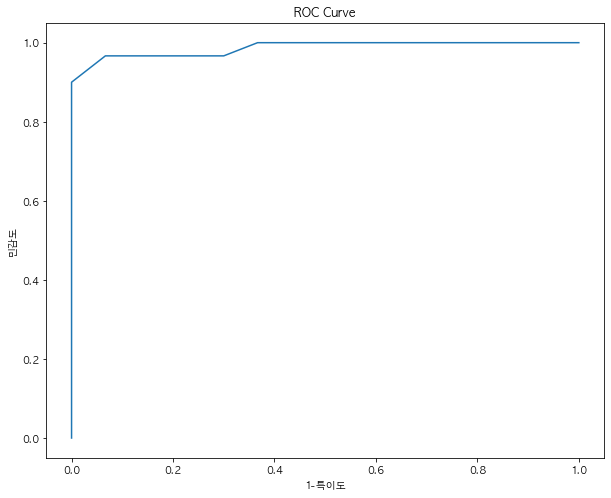

0.9866666666666667

0.9866666666666667

In [8]:
## ROC 커브
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

fpr, tpr, thres = roc_curve(target, y_prob)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('1-특이도')
plt.ylabel('민감도')
plt.show()

display(roc_auc_score(target, y_prob))
display(auc(fpr, tpr))

# 나이브 베이즈 분류

In [9]:
import pandas as pd

df_train = pd.read_csv('./dataset/ch6-2_train.csv')
df_test = pd.read_csv('./dataset/ch6-2_test.csv')

display(df_train.info())
print('--'*20)
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  240 non-null    int64 
 1   tail_length  240 non-null    int64 
 2   comb_height  240 non-null    int64 
 3   breeds       240 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.6+ KB


None

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wing_length  60 non-null     int64 
 1   tail_length  60 non-null     int64 
 2   comb_height  60 non-null     int64 
 3   breeds       60 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


None

In [10]:
## 독립변수 종속 변수 분리

train_x = df_train.iloc[:, 0:3].values
train_y = df_train.iloc[:, 3].values

test_x = df_test.iloc[:, 0:3].values
test_y = df_test.iloc[:, 3].values

In [11]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB().fit(train_x, train_y)

y_pred_nb = model_nb.predict(test_x)
y_pred_nb

array(['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'b', 'b', 'b', 'b',
       'a', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'], dtype='<U1')

In [12]:
from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_nb)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_nb))

confusion matrix :
 [[20  0  0]
 [ 1 17  2]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



# K-최근접 이웃

## k=3

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

y_pred_knn = model_knn.predict(test_x)


from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_knn)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_knn))

confusion matrix :
 [[19  1  0]
 [ 1 17  2]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.85      0.87        20
           c       0.90      0.95      0.93        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



## k=3 & StandardScaling

    - Scaling 후 성능 향상 (거리기반)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3).fit(train_x_scaled, train_y)

y_pred_knn = model_knn.predict(test_x_scaled)


from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_knn)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_knn))

confusion matrix :
 [[19  1  0]
 [ 1 18  1]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.90      0.90      0.90        20
           c       0.95      0.95      0.95        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



## k=5

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5).fit(train_x_scaled, train_y)

y_pred_knn = model_knn.predict(test_x_scaled)


from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_knn)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_knn))

confusion matrix :
 [[19  1  0]
 [ 1 18  1]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.90      0.90      0.90        20
           c       0.95      0.95      0.95        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



# 의사결정나무

In [16]:
## Gini

from sklearn.tree import DecisionTreeClassifier, plot_tree

model_tree = DecisionTreeClassifier()
model_tree.fit(train_x, train_y)

y_pred_tree = model_tree.predict(test_x)

from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_tree)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_tree))

confusion matrix :
 [[20  0  0]
 [ 1 18  1]
 [ 0  4 16]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.82      0.90      0.86        20
           c       0.94      0.80      0.86        20

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [17]:
## Gini

from sklearn.tree import DecisionTreeClassifier, plot_tree

model_tree2 = DecisionTreeClassifier(criterion='entropy')
model_tree2.fit(train_x, train_y)

y_pred_tree2 = model_tree2.predict(test_x)

from sklearn.metrics import confusion_matrix

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_tree2)}')

from sklearn.metrics import classification_report

print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_tree2))

confusion matrix :
 [[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



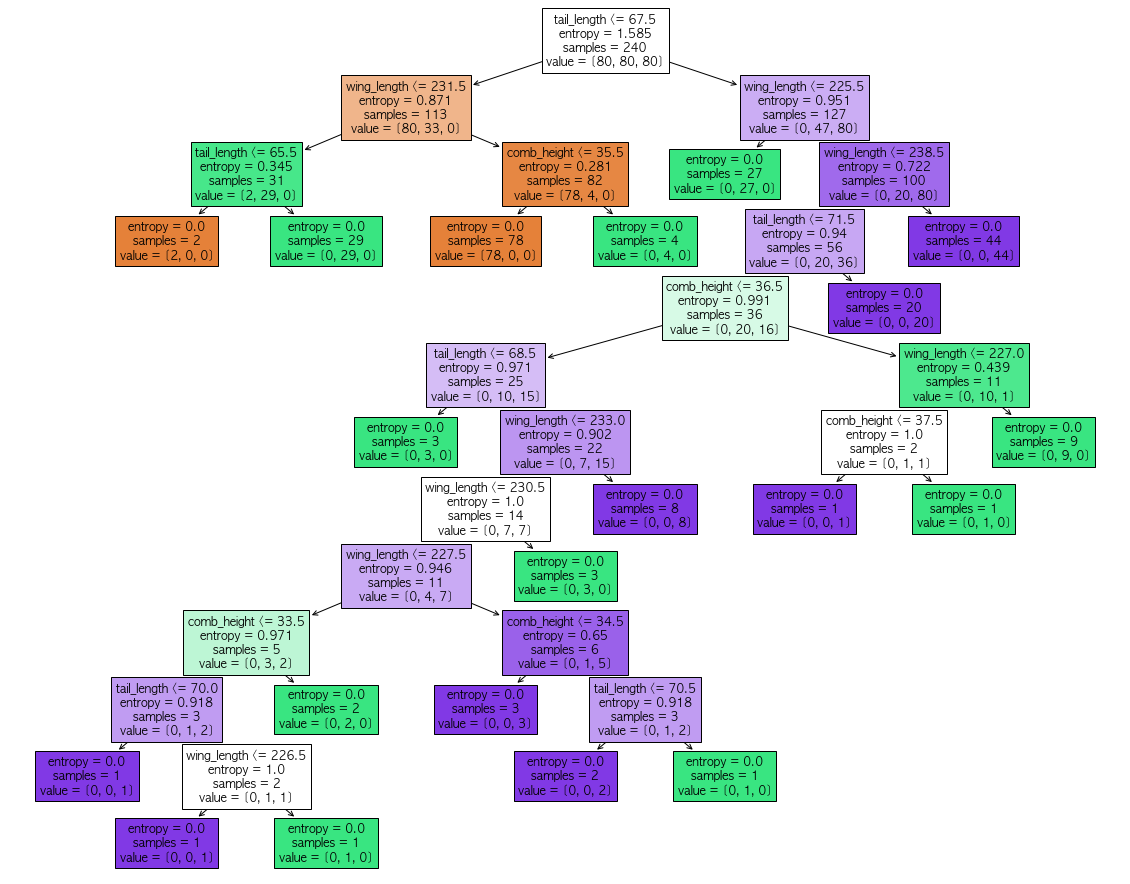

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 16))
plot_tree(model_tree2, feature_names=['wing_length', 'tail_length', 'comb_height'], filled=True)
plt.show()

## 과적합 -> 규제 필요 (depth=3 지정 / pruning)

In [19]:
model_tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(train_x, train_y)

y_pred_tree3 = model_tree3.predict(test_x)

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_tree2)}')
print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_tree2))

confusion matrix :
 [[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



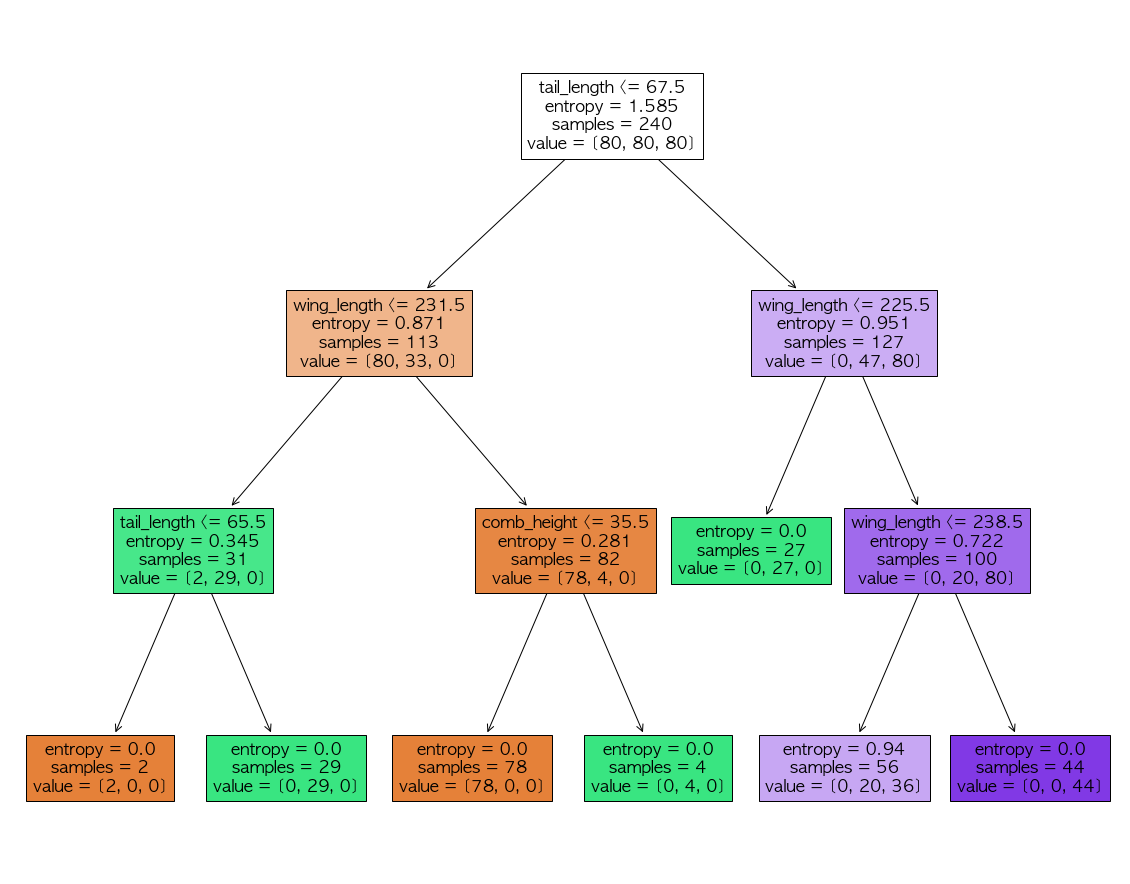

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 16))
plot_tree(model_tree3, feature_names=['wing_length', 'tail_length', 'comb_height'], filled=True)
plt.show()

# 배깅(ensemble1)
    - 학습데이터 셋으로부터 동일한 크기의 표본을 단순 랜덤 복원 추출
    
    - 표본을 여러개 만들어서 다수의 모델을 만드려면 bootstrap(부트스르랩)

In [21]:
from sklearn.ensemble import BaggingClassifier

model_bag = BaggingClassifier(oob_score=True).fit(train_x, train_y)
y_pred_bag = model_bag.predict(test_x)

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_bag)}')
print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_bag))

confusion matrix :
 [[19  1  0]
 [ 1 17  2]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      0.95      0.95        20
           b       0.89      0.85      0.87        20
           c       0.90      0.95      0.93        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:644: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


In [22]:
## 나머지 선택되지 않는 약 28% 정도로 분류성능 확인할수 있음 (Out of bag => oob)
model_bag.oob_score_

0.9166666666666666

# 랜덤포레스트

    - 독립변수까지 랜덤추출

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(train_x, train_y)
y_pred_rf = model_rf.predict(test_x)

print(f'confusion matrix :\n {confusion_matrix(test_y, y_pred_rf)}')
print('\n\nCLASSIFICATION REPORT')
print(classification_report(test_y, y_pred_rf))

confusion matrix :
 [[20  0  0]
 [ 1 18  1]
 [ 0  1 19]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



# 부스팅(ensemble)

    - 각 표본에 동일한 확률을 부여하는 것과 달리 분류된 표본에 더 큰 가중치를 적용해 새로운 분류 규칙을 만듬
    - 잘못 분류된 데이터셋에 가중치 부여 -> 이 에러가 작아지도록

In [24]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier().fit(train_x, train_y)
y_pred_ada = model_ada.predict(test_x)


print(confusion_matrix(test_y, y_pred_ada))

print(classification_report(test_y, y_pred_ada))

[[20  0  0]
 [ 1 16  3]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.80      0.86        20
           c       0.86      0.95      0.90        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier().fit(train_x, train_y)
y_pred_gb = model_gb.predict(test_x)

print(confusion_matrix(test_y, y_pred_gb))

print(classification_report(test_y, y_pred_gb))

[[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.90      0.90      0.90        20
           c       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



# 서포트벡터머신
    - 고차원의 공간에서 최적의 분리 초평면(Hyper Plane)을 찾아 이를 활용해 분류 및 회귀
    - 비선형일떄는 커널 함수 활용 (linear, polynomial, gaussian, rbf, sigmoid ..)

In [26]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear').fit(train_x, train_y)

y_pred_svm = model_svm.predict(test_x)

print(confusion_matrix(test_y, y_pred_svm))

print(classification_report(test_y, y_pred_svm))

[[20  0  0]
 [ 1 17  2]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.94      0.85      0.89        20
           c       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [27]:
df_y_pred_svm = pd.DataFrame(y_pred_svm, columns=['breeds_pred'])

df_svm = pd.concat([df_test, df_y_pred_svm], axis = 1)
df_svm.head()

,wing_length,tail_length,comb_height,breeds,breeds_pred
0,258,67,32,a,a
1,260,64,34,a,a
2,251,63,31,a,a
3,248,63,30,a,a
4,254,62,32,a,a


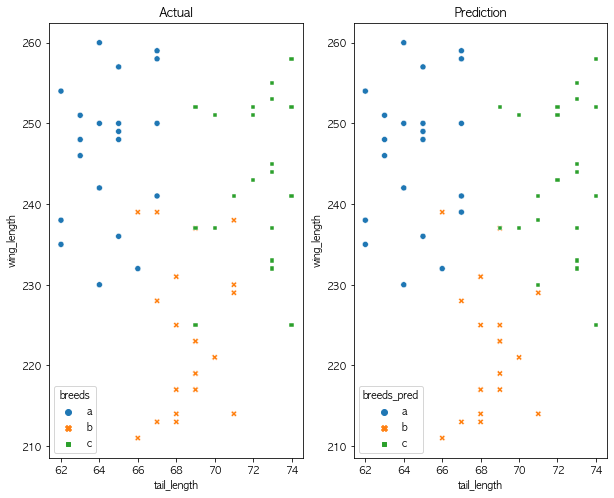

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds', style='breeds')
plt.title('Actual')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_svm, x='tail_length', y='wing_length', hue='breeds_pred', style='breeds_pred')
plt.title('Prediction')
plt.show()

# XGBoost와 Hyper parameter tuning

    - target값 레이블->카테고리로 처리해야해!
    - confusion matrix & classfication_report 할때 test target값도 같은 레이블->카테고리

In [58]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder().fit(train_y)
train_y_label = lbe.transform(train_y)
test_y_label = lbe.transform(test_y)
test_y_label

from xgboost import XGBClassifier

model_xgb = XGBClassifier().fit(train_x, train_y_label)

y_pred_xgb = model_xgb.predict(test_x)
y_pred_xgb
print(confusion_matrix(test_y_label, y_pred_xgb))

print(classification_report(test_y_label, y_pred_xgb))

[[20  0  0]
 [ 1 18  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.95      0.90      0.92        20
           2       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [60]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'eta' : [0.05, 0.1, 0.15, 0.3, 0.5],
    'gamma' : [0, 0.5, 1, 2],
    'max_depth' : [2, 4, 6, 8]
}


xgb_grid = GridSearchCV(XGBClassifier(), param_grid=grid_params, n_jobs=-1, scoring='accuracy')

xgb_grid.fit(train_x, train_y_label)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_...one,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                            

In [61]:
xgb_grid.best_params_

{'eta': 0.1, 'gamma': 0, 'max_depth': 6}

In [65]:
xgb_grid_pred_y = xgb_grid.predict(test_x)
print(confusion_matrix(test_y_label, xgb_grid_pred_y))

print(classification_report(test_y_label, xgb_grid_pred_y))

[[20  0  0]
 [ 1 18  1]
 [ 0  2 18]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.90      0.90      0.90        20
           2       0.95      0.90      0.92        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60

